In [1]:
from vega import VegaLite
from IPython.display import display
import json
import csv


In [2]:
def generate_line(data, features, x="x", y="y", z="z", size=300):
    z=z+"_color"
    lines={
        "width": size,
        "height": size,
        "data": {
            "values":data
                },
        
        "selection":
                    {
                    "org1":
                        {
                        "empty":"all",
                        "type":"single",
                        "fields":["name"]
                        }
                    },
        "layer":[]
    }
    
    
    for feature in features:
        layer={
        "encoding":
            {
            "x": {"field": x, "type": "quantitative"},
            "y": {"field": y, "type": "quantitative"} 
            },
        "transform":
            [
            {
            "filter":
                    {"field":"feature","equal":feature}
            }
            ],
        "layer":[
            {
            "mark": {"type":"line"},
            "encoding":
                {    
                "color":
                    {
                    "field":z,
                    "type":"quantitative",
                    "scale":
                        {
                        #"domain": [0,10],
                        "range": ["white","yellow","orange", "red", "violet", "bleu", "black"]
                        }
                    },
                "opacity":
                    {
                    "condition":
                        {
                        "selection":"org1",
                        "type":"nominal",
                        "field":"feature",
                        "value":0.8
                        },
                    "value":0.1
                    }        
                }
            },
            {
            "transform":
                [
                {
                "filter":
                    {
                    "field":"name",
                    "equal":"yes"
                    }
                }
                ],
            "mark":     
                {"type": "text", "text":feature},
            "encoding":
                {
                "tooltip":
                    [
                    {"field":"feature", "type": "nominal"},
                    {"field":"x", "type":"quantitative"},
                    {"field":"y", "type":"quantitative"},
                    {"field":"z", "type":"quantitative"}
                    ]
                }
            }
        ]
        }
    
    

        lines["layer"].append(layer)
    
    return lines

In [3]:
def generate_scatterplot_with_text(data, x="x", y="y", z="z", size=1500):

    scatterplot= {
        "width":size,
        "height":size,
        "data": data,
        "selection": {
                "grid": {
                      "type": "interval", "bind": "scales"
                        }
                },
        "encoding":
            {
            "x":{ "field": x, "type": "quantitative"},
            "y":{ "field": y, "type": "quantitative"}
            },
        "layer":
            [
                {
                "selection":
                    {
                    "org1":
                        {
                        "empty":"all",
                        "type":"single",
                        "fields":["name"]
                        }
                    },
                 
                "mark":"circle",             
                "size": 
                    {
                    "value":300
                    },
                "encoding":
                    {
                        
                    "x":{ "field": x, "type": "quantitative"},
                    "y":{ "field": y, "type": "quantitative"},
                    "color":{
                        "field":z,
                        "type":"quantitative",
                        "scale":
                            {
                             "range": ["orange", "red", "violet", "bleu"]
                            }
                        },
                    "tooltip":
                        [
                        {"field": "name", "type": "nominal"},
                        {"field": "id", "type": "quantitative"}
                        ]            
                        
                    }
                
                },
                  {
                 "mark":
                    {
                    "type":"text",
                    "align":"center",
                    "baseline":"bottom",
                    "dy":-10
                    },
                  "encoding":
                    {
                    "text":
                        {
                        "field":"name",
                        "type":"nominal"
                        },
                
                       "tooltip":
                        [
                        {"field":"name", "type": "nominal"},
                        {"field":"x", "type":"quantitative"},
                        {"field":"y", "type":"quantitative"},
                        {"field":"z", "type":"quantitative"}
                        ]
                            
                    }
                
                  }
          
            ]
    }
    
 

                
            
            
           
    
    return scatterplot

In [4]:
def generate_scatterplot(data, x="x", y="y", z="z", option="with_text", size=1500):

    scatterplot= {
        "width":size,
        "height":size,
        "data": data,

        "encoding":
            {
            "x":{ "field": x, "type": "quantitative"},
            "y":{ "field": y, "type": "quantitative"}
            },

        "selection":
                    {
                    "org1":
                        {
                        "empty":"all",
                        "type":"single",
                        "fields":["name"]
                        }
                    },
                 
                "mark":"circle",             
                "size": 
                    {
                    "value":300
                    },
                "encoding":
                    {
                        
                    "x":{ "field": x, "type": "quantitative"},
                    "y":{ "field": y, "type": "quantitative"},
                    "color":{
                        "field":z,
                        "type":"quantitative",
                        "scale":
                            {
                             "range": ["orange", "red", "violet", "bleu"]
                            }
                        },
                    "tooltip":
                        [
                        {"field": "name", "type": "nominal"},
                        {"field": "id", "type": "quantitative"}
                        ],
                             
                "opacity":
                    {
                    "condition":
                        {
                        "selection":"org1",
                        "type":"nominal",
                        "field":"name",
                        "value":0.8
                        },
                    "value":0.1
                    }
                        
                        
                    }
                
    }
    
  
                
            
            
           
    
    return scatterplot

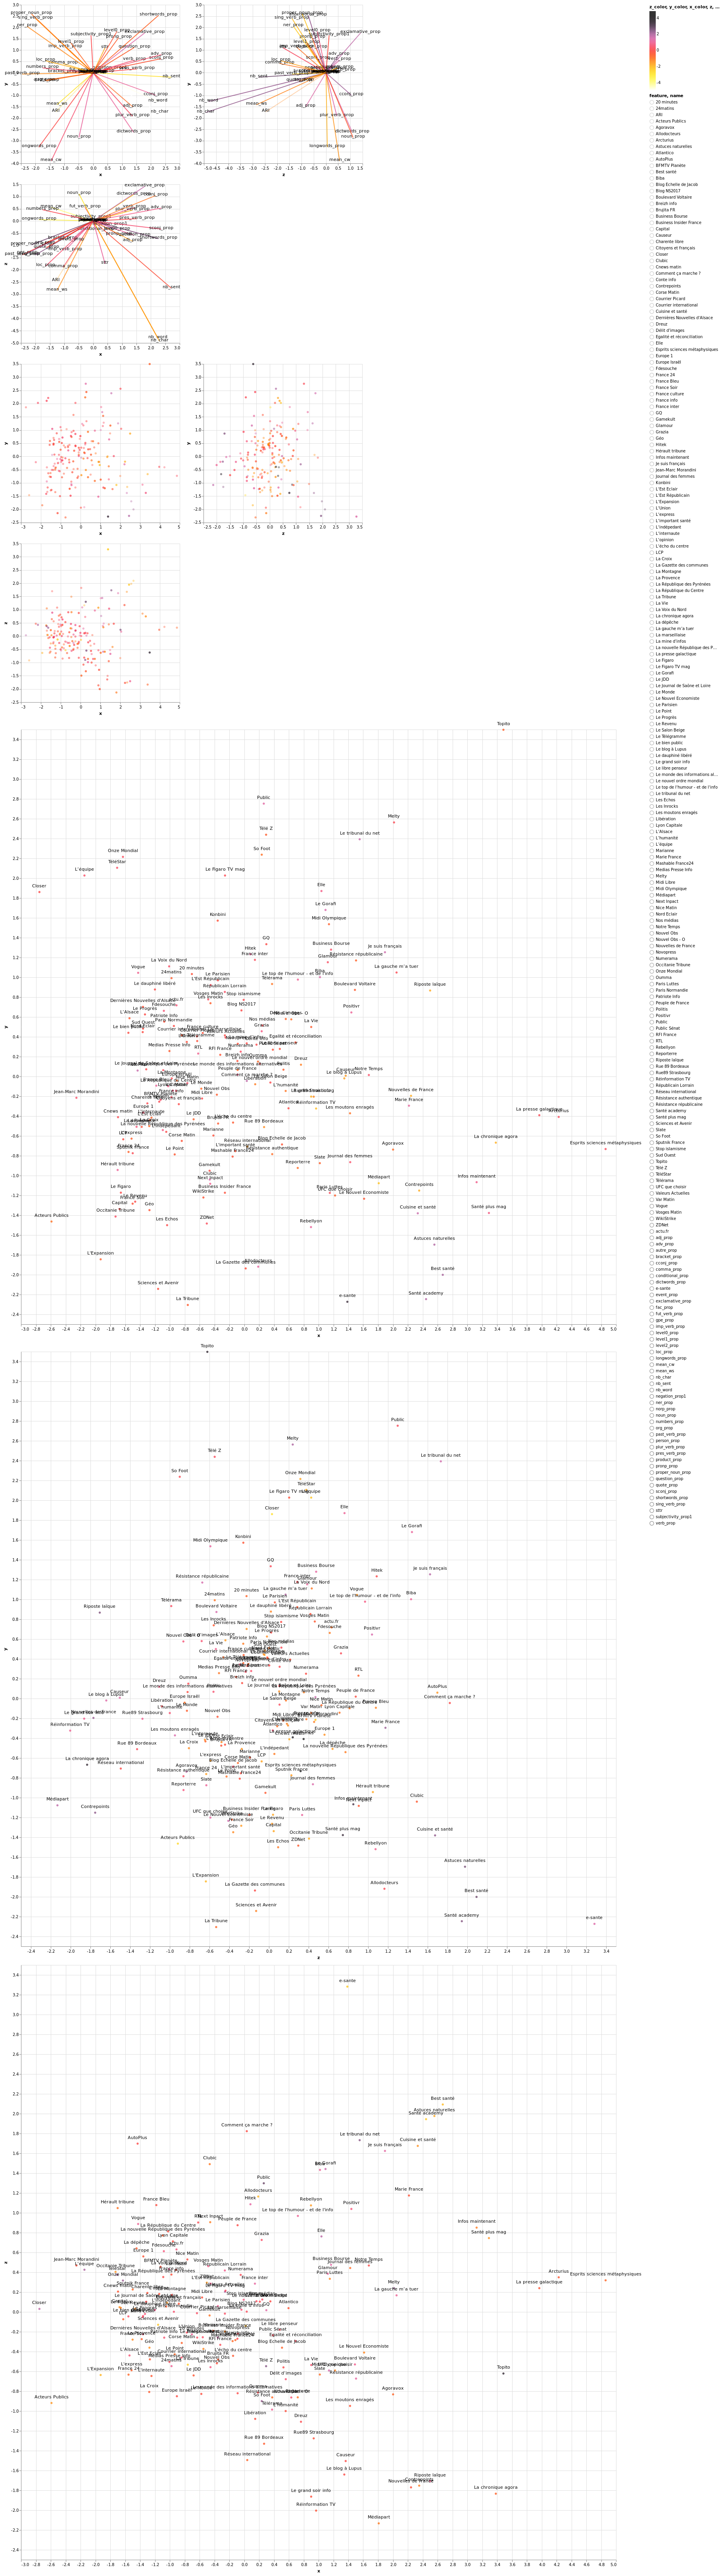

In [5]:
FEATURES_NAMES=["ARI", "nb_sent", "nb_word", "nb_char", "mean_cw", "mean_ws", "median_cw", "median_ws", "shortwords_prop" , "longwords_prop" ,"max_len_word", "dictwords_prop", "proper_noun_prop", "negation_prop1", "negation_prop2", "subjectivity_prop1", "subjectivity_prop2", "verb_prop", "past_verb_cardinality", "pres_verb_cardinality", "fut_verb_cardinality", "imp_verb_cardinality", "other_verb_cardinality","past_verb_prop", "pres_verb_prop", "fut_verb_prop","imp_verb_prop", "plur_verb_prop","sing_verb_prop","verbs_diversity", "conditional_prop","question_prop","exclamative_prop","quote_prop","bracket_prop","noun_prop","cconj_prop", "sconj_prop", "pronp_prop", "adj_prop","adv_prop", "a", "e", "i", "l", "n", "o", "sttr", "comma_prop", "numbers_prop", "level0_prop", "level1_prop", "level2_prop", "autre_prop", "ner_prop", "person_prop", "norp_prop", "fac_prop", "org_prop", "gpe_prop", "loc_prop", "product_prop", "event_prop" ]

with open('data/vector_mean_data.json', 'r') as f:
    values=json.load(f)

    
lines1=generate_line(values, FEATURES_NAMES, "x", "y", "z", 400)
lines2=generate_line(values, FEATURES_NAMES, "z", "y", "x", 400)
lines3=generate_line(values, FEATURES_NAMES, "x", "z", "y", 400)

new1={
    "hconcat":[
        {"vconcat":[lines1,lines3]},
        lines2
        ]
    }




with open("data/reg_dim_mean_features_media_data.json", "r") as f:
    values=json.load(f)
values={"values":values}



histogram1=generate_scatterplot(values, "x", "y", "z", "without_text", 400)
histogram2=generate_scatterplot(values, "z", "y", "x", "without_text", 400)
histogram3=generate_scatterplot(values, "x", "z", "y", "without_text", 400)


new2={
    "hconcat":[
        {"vconcat":[histogram1,histogram3]},
        histogram2
        ]
    }

with open("data/reg_dim_mean_features_media_data.json", "r") as f:
    values=json.load(f)
values={"values":values}



histogram1=generate_scatterplot_with_text(values, "x", "y", "z")
histogram2=generate_scatterplot_with_text(values, "z", "y", "x")
histogram3=generate_scatterplot_with_text(values, "x", "z", "y")

new3={
    "vconcat":
    [histogram1,histogram2,histogram3]
}

new={"vconcat":[new1, new2, new3]}

VegaLite(new)